In [1]:
# Import necessary libraries
import pandas as pd  # Used for data manipulation and analysis
import numpy as np  # Used for numerical operations
import scipy.stats as ss  # Used for statistical functions
from itertools import product  # Used for creating Cartesian products from iterables
from tqdm.notebook import tqdm  # Used for creating progress bars in Jupyter notebooks
from sklearn.decomposition import PCA # Import the PCA class for Principal Component Analysis

import matplotlib.pyplot as plt  # Used for creating visualizations
import seaborn as sns  # Used for creating statistical visualizations
sns.set()  # Set the default seaborn theme for visualizations

In [2]:
# Load the dataset from the CSV file
df = pd.read_csv('data/responses_.csv')

# Display descriptive statistics of the dataset
df.describe()

,AM1,AM2,AM3,AM4,DM1,DM2,DM3,DM4,EDT1,EDT2,...,SQ3,SQ4,FST1,FST2,FST3,FST4,FI1,FI2,FI3,FI4
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,...,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,3.957143,4.080952,4.190476,4.080952,3.995238,4.080952,4.038095,4.033333,4.114286,4.147619,...,3.790476,3.766667,3.671429,3.800000,2.252381,2.490476,3.847619,3.914286,3.909524,4.023810
std,0.919263,0.884810,0.886855,0.962512,0.960949,0.927062,0.916868,0.940240,0.956612,0.918767,...,0.985010,0.972263,0.870375,0.900824,1.029758,1.081557,0.827528,0.859668,0.883883,0.882799
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3.000000,3.250000,3.000000,3.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [3]:
# Calculate and print the total number of missing values (NaN) in the DataFrame
df.isna().sum().sum() 

0

# Get Average Per Class

In [4]:
big_list = []
small_list = []
for i in list(df.columns):
    if small_list == []:
        small_list.append(i)
    if i[:-1] == small_list[0][:-1]:
        small_list.append(i)
    if i[:-1] != small_list[0][:-1]:
        big_list.append(list(set(small_list)))
        small_list = []
        small_list.append(i)

big_list.append(['FI1', 'FI2', 'FI3', 'FI4'])
big_list

[['AM1', 'AM2', 'AM4', 'AM3'],
 ['DM2', 'DM3', 'DM1', 'DM4'],
 ['EDT5', 'EDT2', 'EDT1', 'EDT3', 'EDT4'],
 ['FM1', 'FM2', 'FM3'],
 ['OTPM2', 'OTPM4', 'OTPM3', 'OTPM1'],
 ['PM2', 'PM1', 'PM3', 'PM4'],
 ['QM2', 'QM1', 'QM4', 'QM3'],
 ['SHE4', 'SHE3', 'SHE1', 'SHE2'],
 ['FS4', 'FS2', 'FS3', 'FS1'],
 ['OEE2', 'OEE3', 'OEE1', 'OEE4'],
 ['CMP2', 'CMP6', 'CMP1', 'CMP7', 'CMP4', 'CMP5', 'CMP3'],
 ['PR1', 'PR4', 'PR3', 'PR2'],
 ['A2', 'A4', 'A3', 'A1'],
 ['RL1', 'RL4', 'RL3', 'RL2'],
 ['EM1', 'EM3', 'EM2', 'EM4'],
 ['RS1', 'RS3', 'RS4', 'RS2'],
 ['T1', 'T3', 'T4', 'T2'],
 ['SQ2', 'SQ3', 'SQ4', 'SQ1'],
 ['FST3', 'FST1', 'FST4', 'FST2'],
 ['FI1', 'FI2', 'FI3', 'FI4']]

In [5]:
median_df = pd.DataFrame()

for small_list in big_list:
    marker = small_list[0][:-1]
    ave = df[small_list].median(axis=1).values
    ceil = ave
    median_df[marker] = ceil

In [6]:
median_df.to_csv('data/median_df.csv', index=False) #Save Median

In [7]:
median_df.shape

(210, 20)

In [8]:
median_df

,AM,DM,EDT,FM,OTPM,PM,QM,SHE,FS,OEE,CMP,PR,A,RL,EM,RS,T,SQ,FST,FI
0,4.0,4.0,4.0,4.0,4.0,4.0,4.5,4.0,4.5,4.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0
1,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,5.0,3.5,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0
2,4.0,4.0,3.0,4.0,2.0,4.0,4.5,5.0,5.0,5.0,4.0,4.0,1.5,2.0,3.0,3.0,3.0,2.5,2.5,4.0
3,5.0,5.0,5.0,5.0,3.5,4.0,4.5,5.0,5.0,4.0,5.0,3.0,3.0,4.0,3.5,3.5,4.0,3.5,3.0,4.0
4,5.0,3.5,4.0,4.0,2.5,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.5,4.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
206,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
207,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
208,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Perform Chi-Square Test

In [9]:
# Get all column names from median_df
cat_var1 = list(median_df.columns)
cat_var2 = list(median_df.columns)

# Generate all possible pairs of column names
cat_var_prod = list(product(cat_var1, cat_var2, repeat=1))

result = []  # Initialize an empty list to store chi-square test results

# Iterate through all pairs of columns
for i in tqdm(cat_var_prod):
    if i[0] != i[1]:  # Ensure that the two columns being compared are not the same
        # Perform chi-square test of independence
        chi2_result = ss.chi2_contingency(pd.crosstab(median_df[i[0]], median_df[i[1]]))
        # Extract the p-value from the chi-square test result
        p_value = chi2_result[1]
        # Append the column names and the p-value to the result list
        result.append((i[0], i[1], p_value))

  0%|          | 0/400 [00:00<?, ?it/s]

In [10]:
# Create a DataFrame from the chi-square test results
chi_test_output = pd.DataFrame(result, columns=['var1', 'var2', 'coeff'])

# Round the p-values (coefficients) to 3 decimal places
chi_test_output['coeff'] = np.around(chi_test_output['coeff'].values, decimals=3)

# Create a pivot table of the chi-square test results
pivot_ct = chi_test_output.pivot(index='var1', columns='var2', values='coeff')

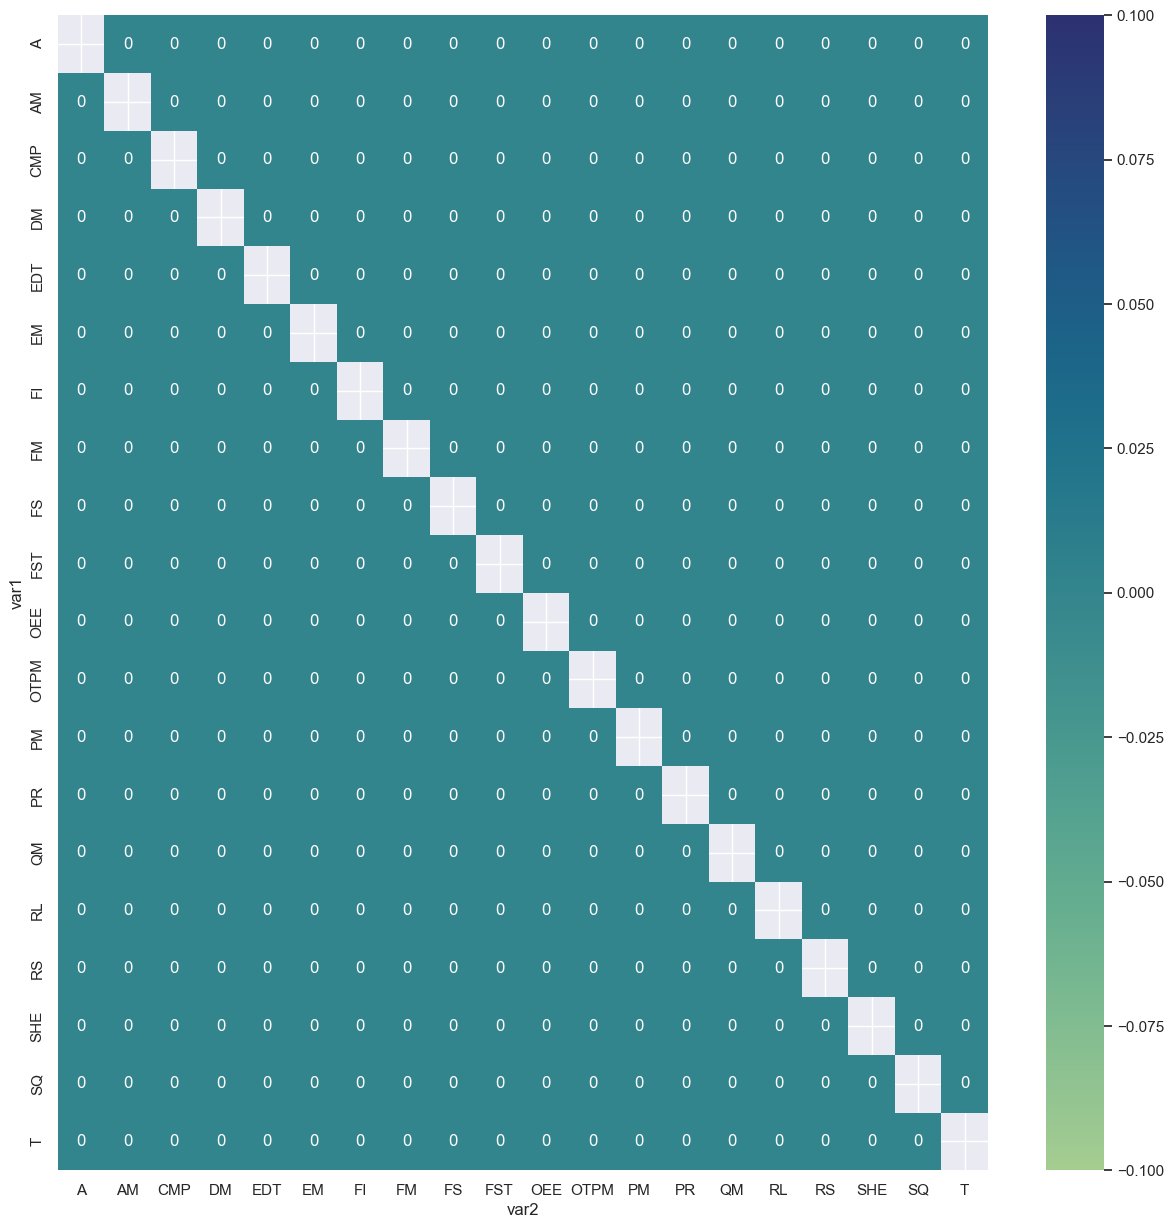

In [11]:
# Set the figure size for the heatmap
plt.figure(figsize=(15, 15))

# Create a heatmap of the pivot table
sns.heatmap(pivot_ct, annot=True, cmap='crest')

# Display the heatmap
plt.show()

# Class Distribution

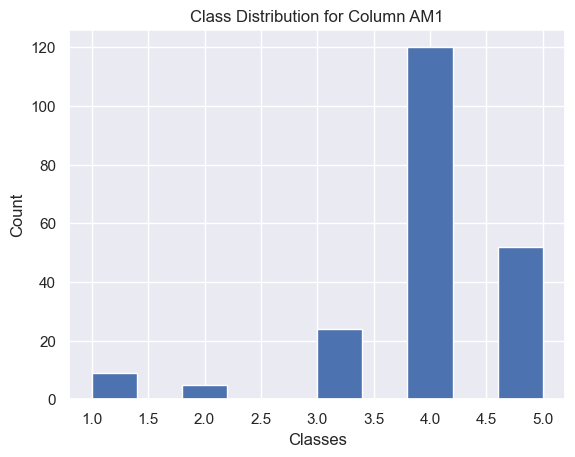

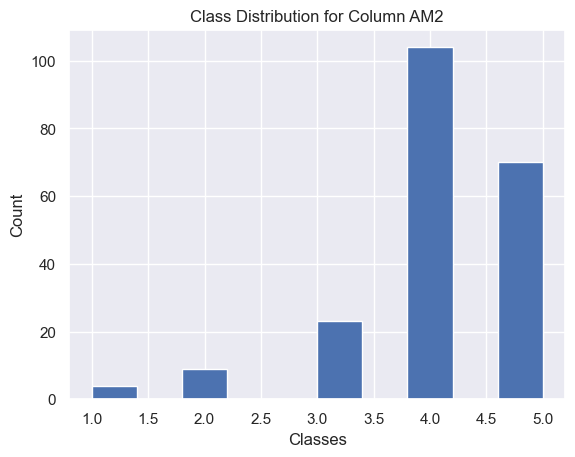

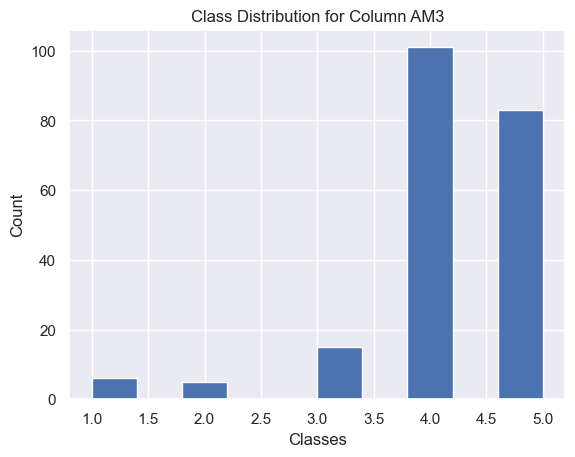

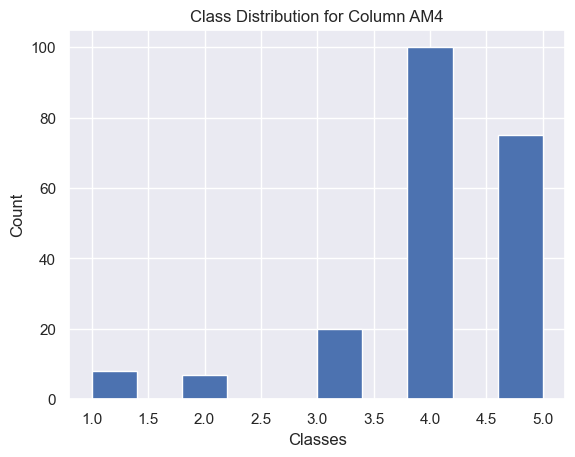

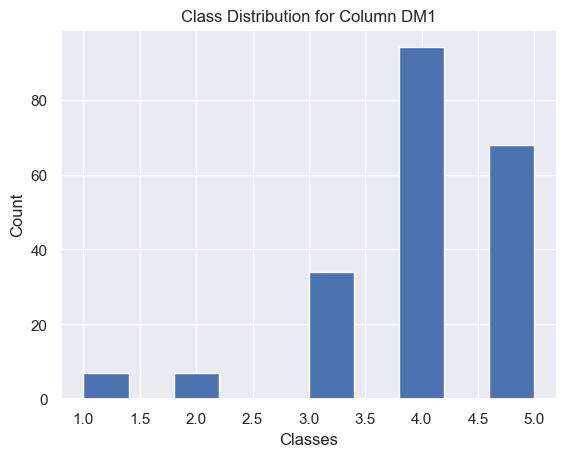

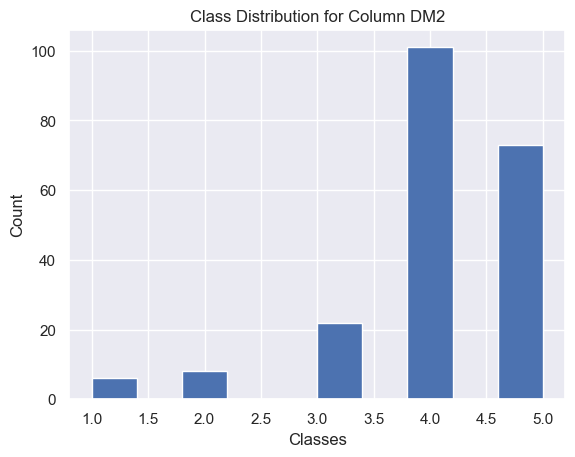

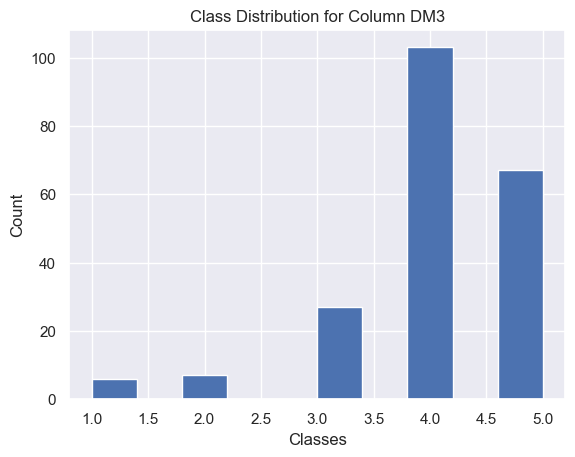

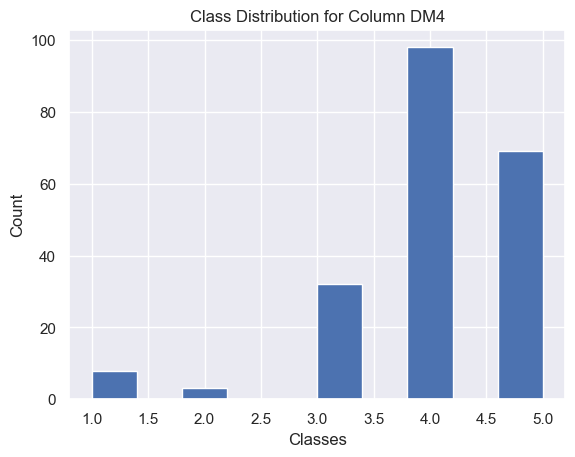

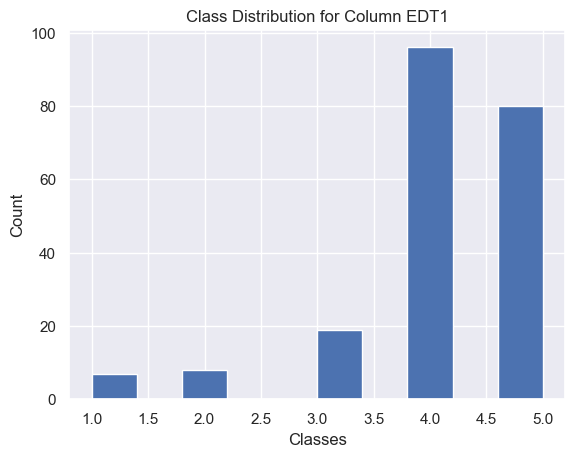

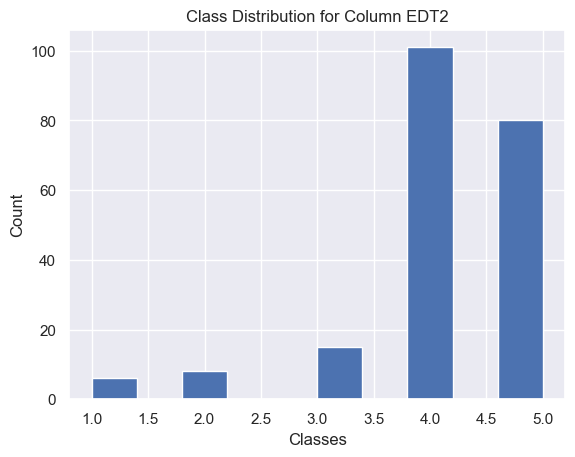

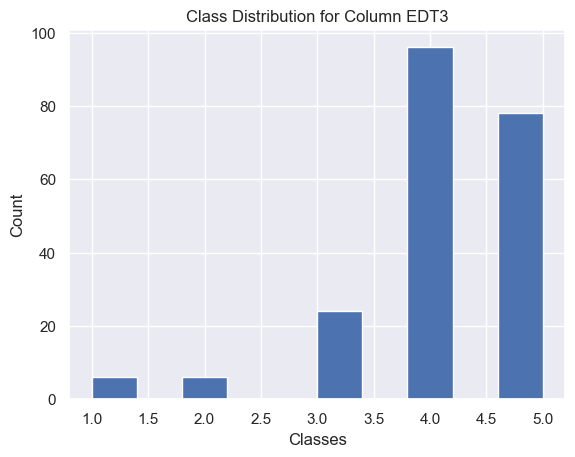

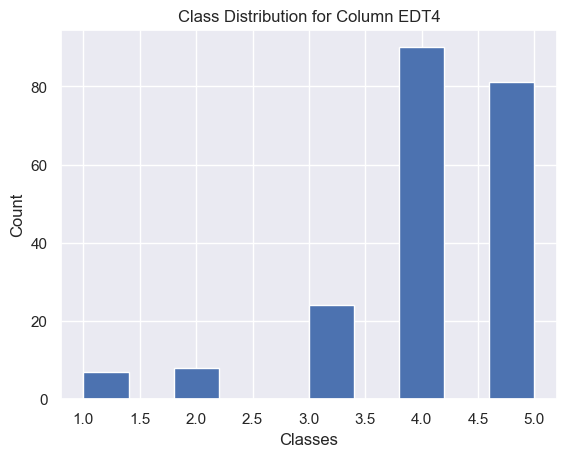

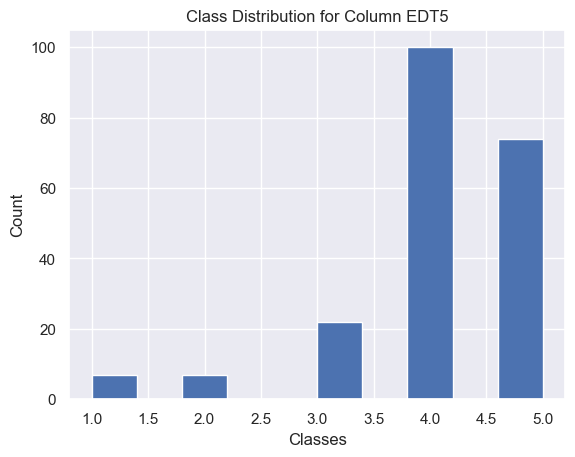

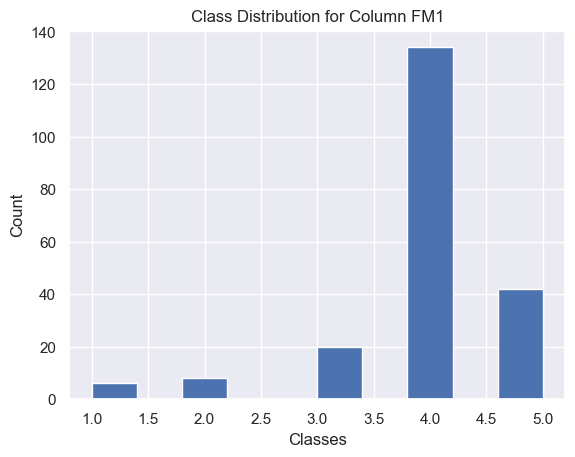

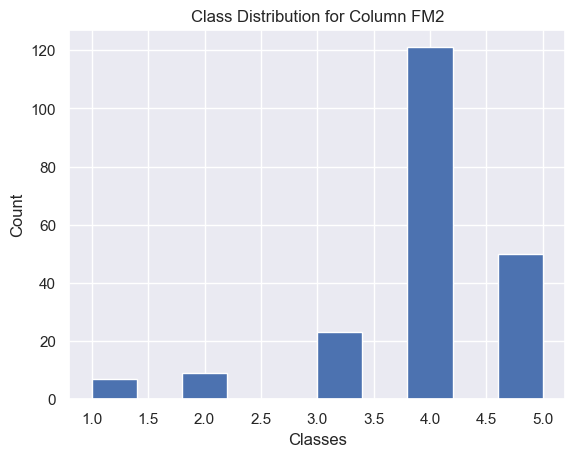

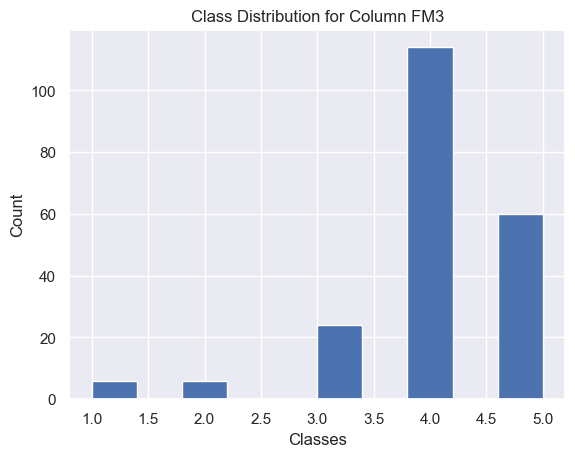

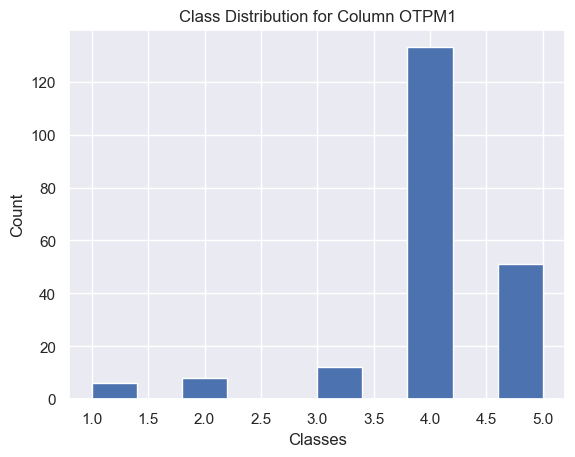

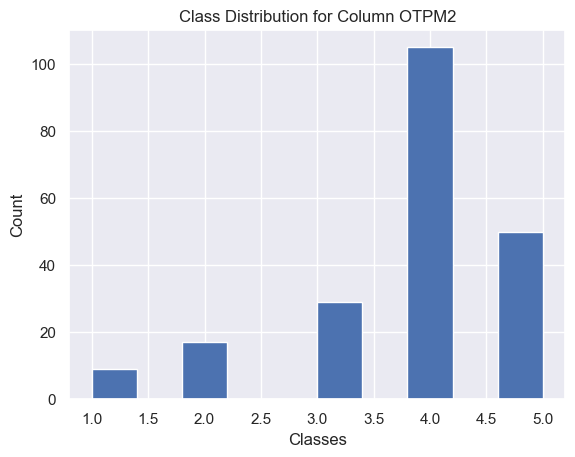

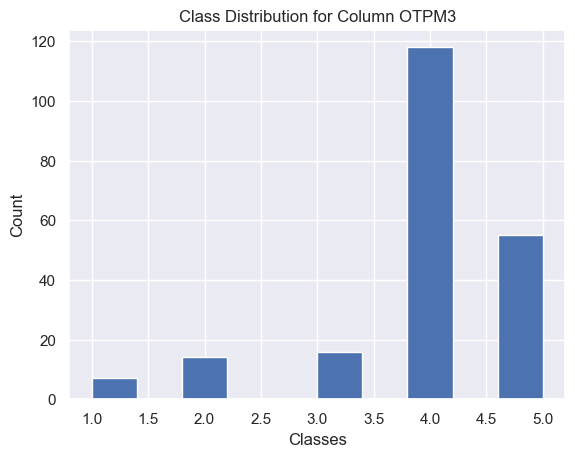

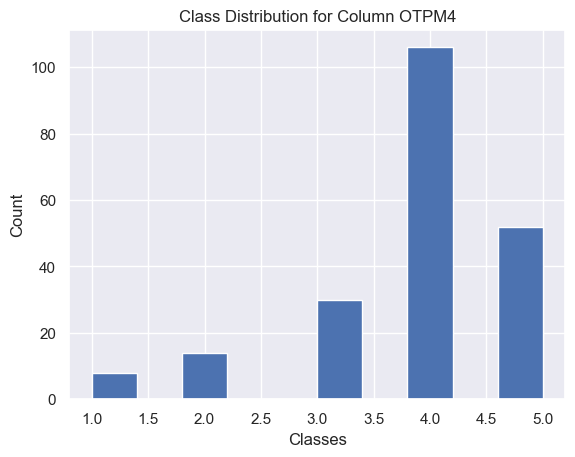

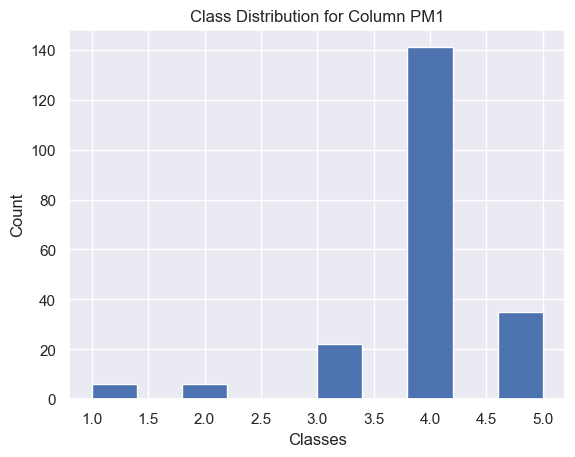

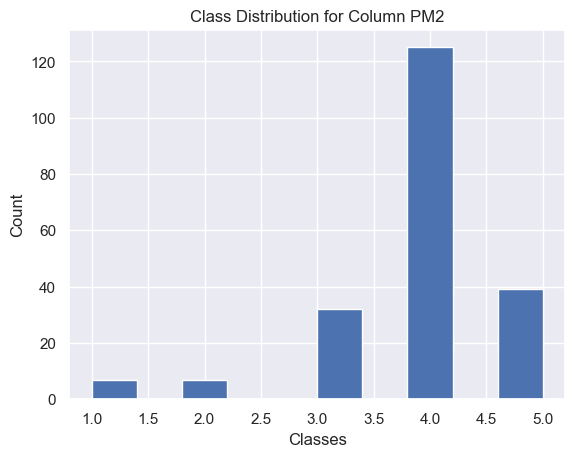

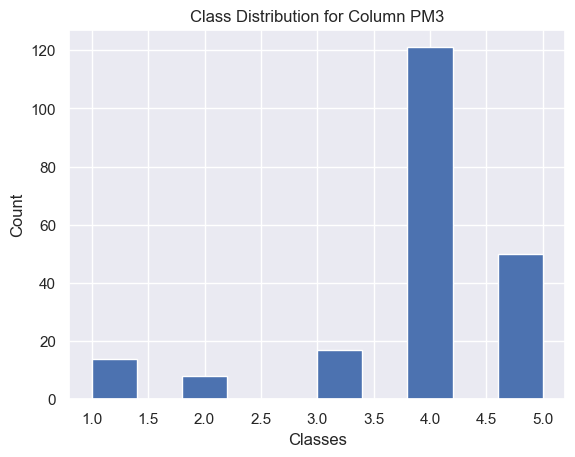

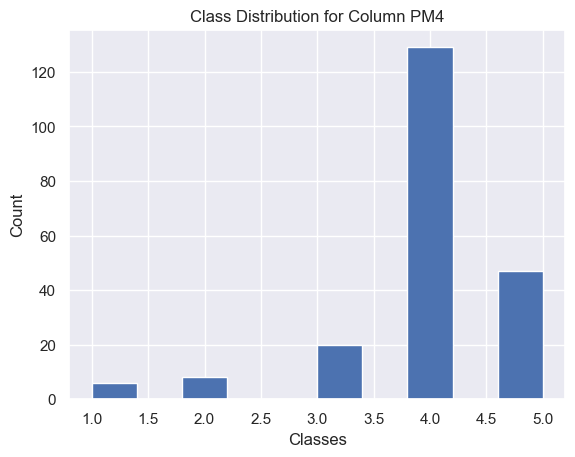

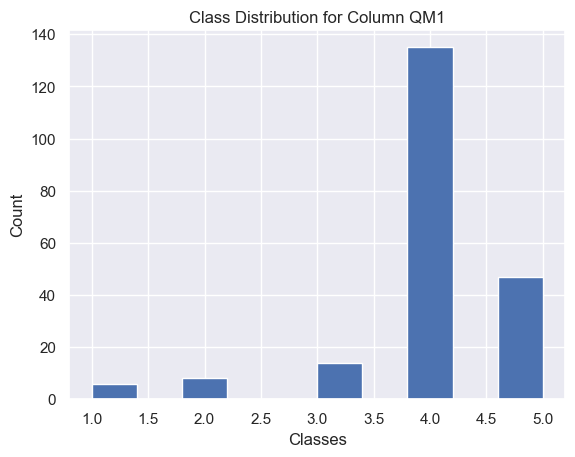

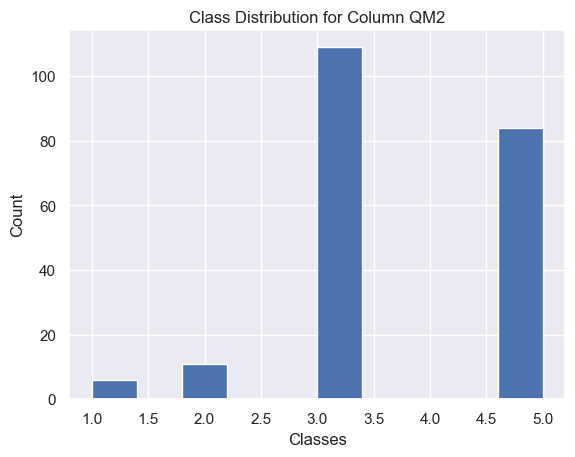

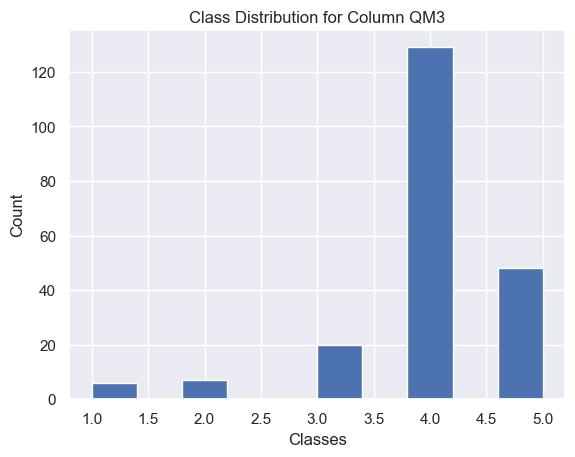

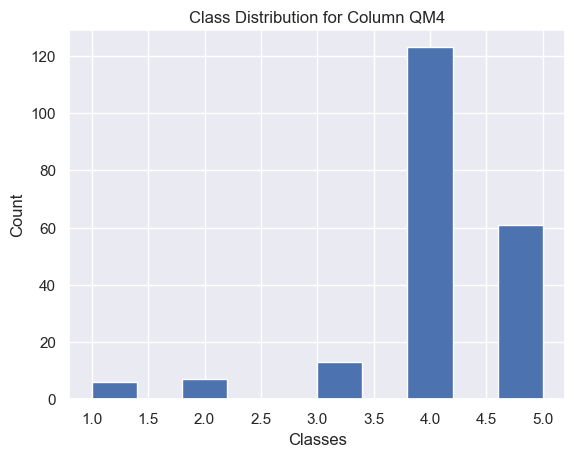

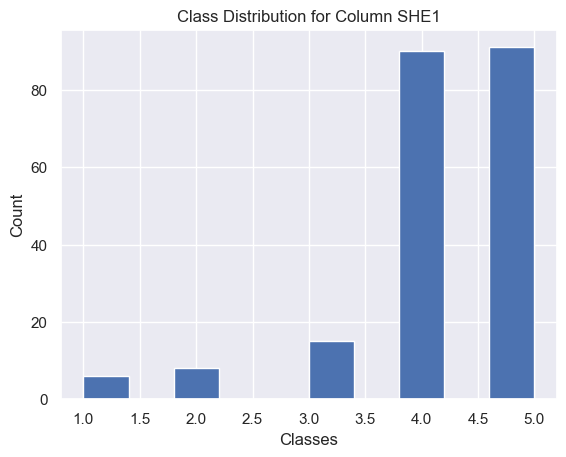

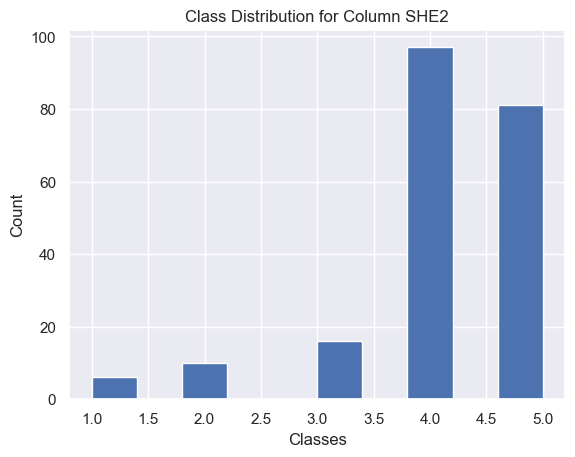

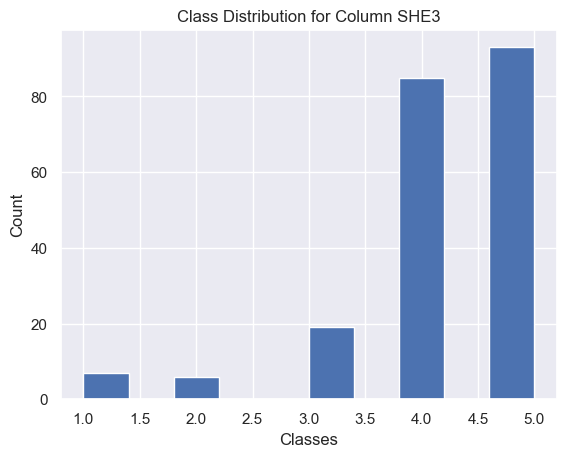

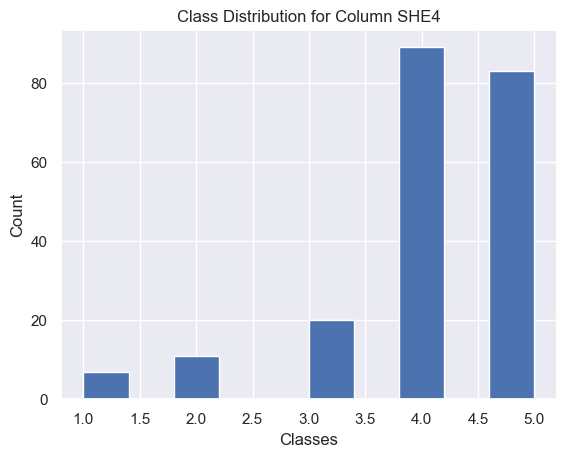

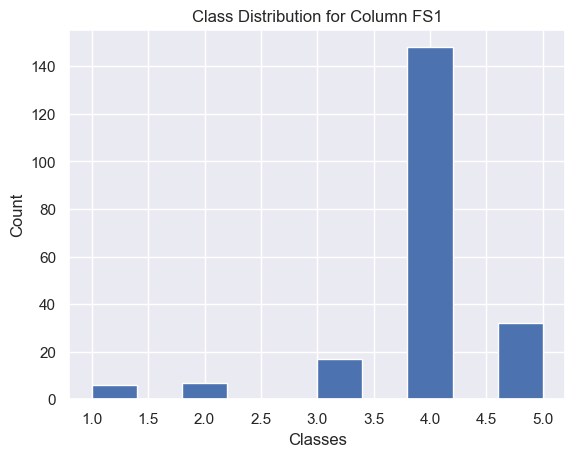

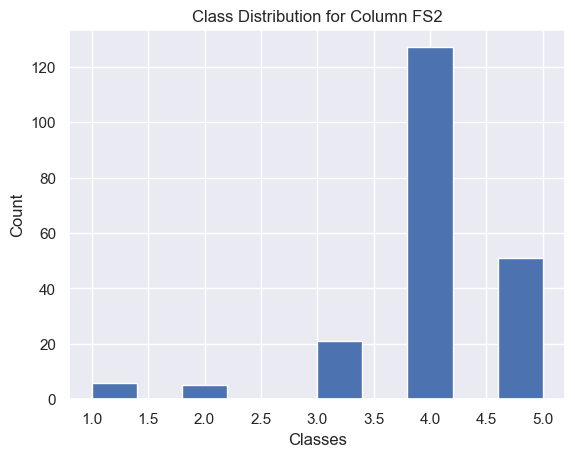

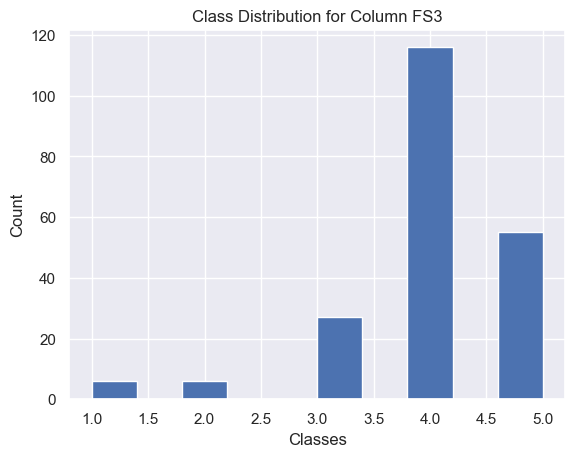

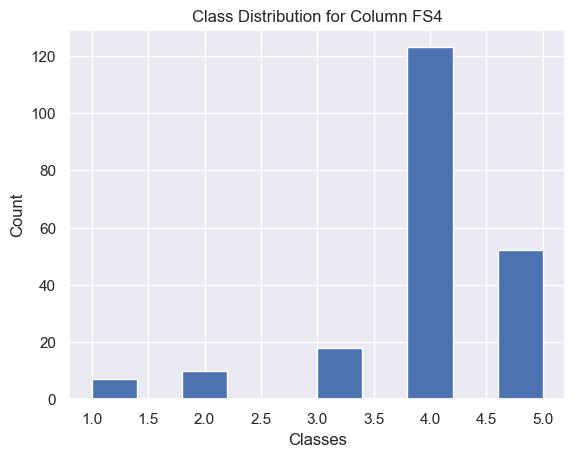

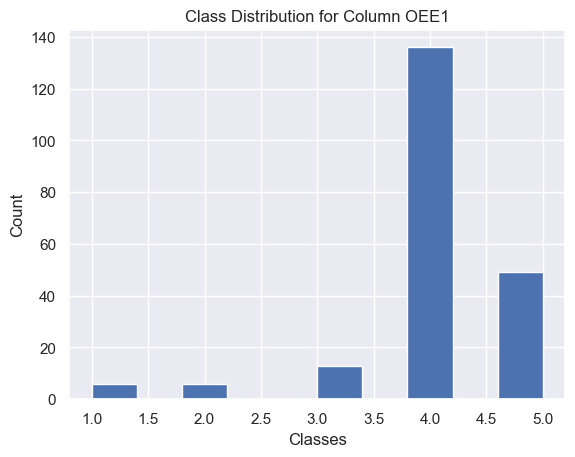

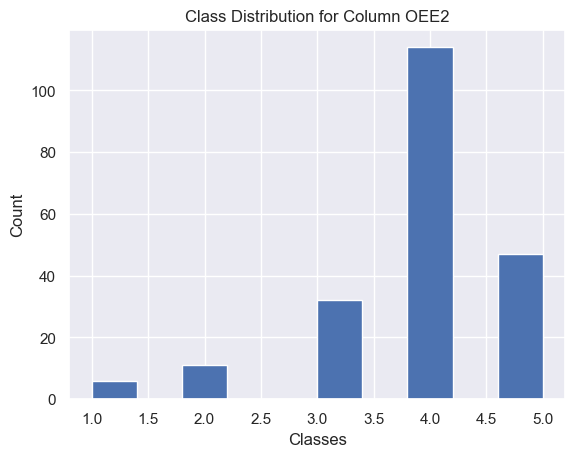

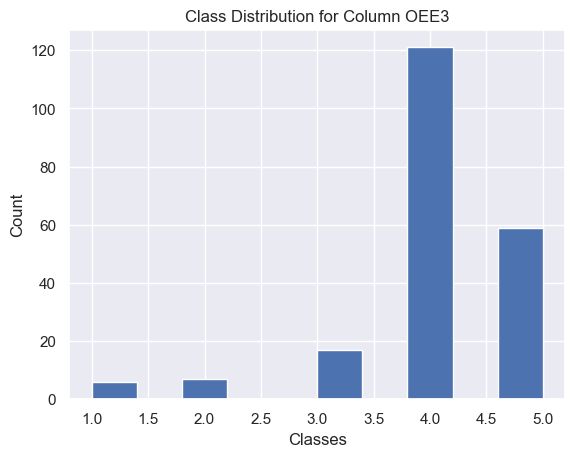

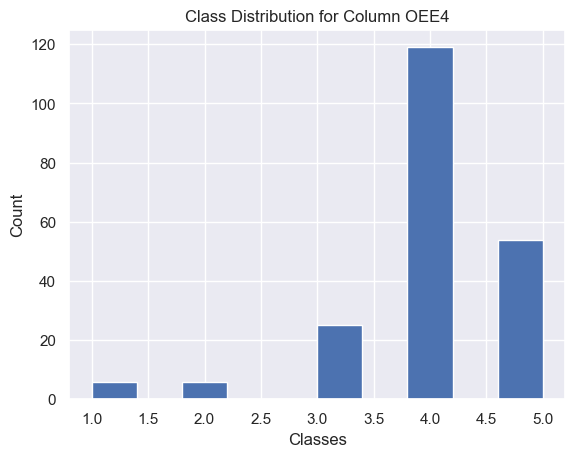

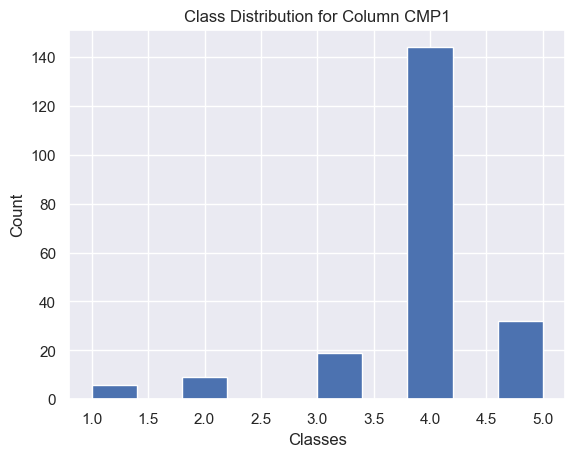

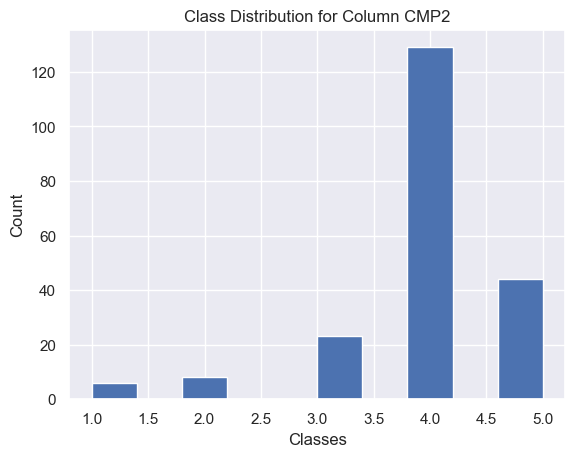

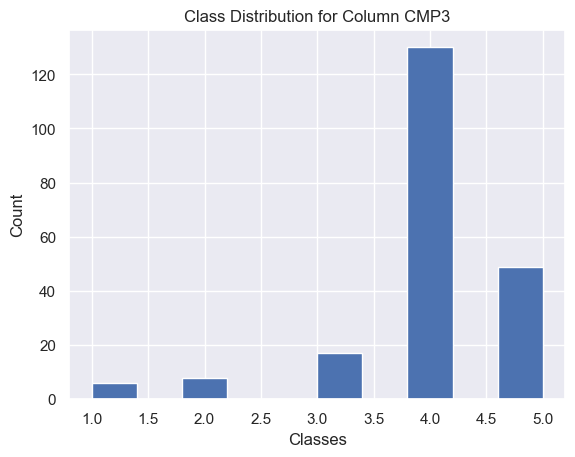

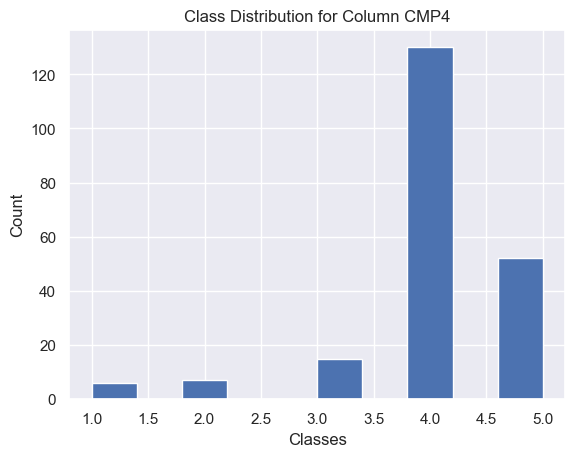

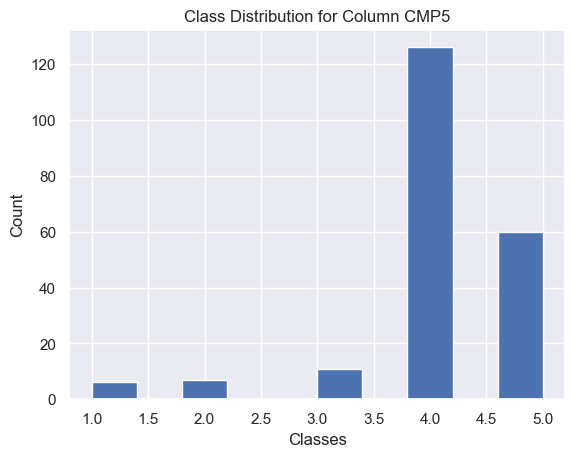

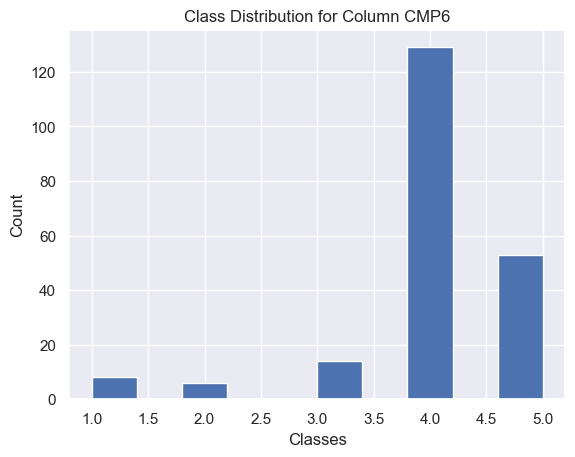

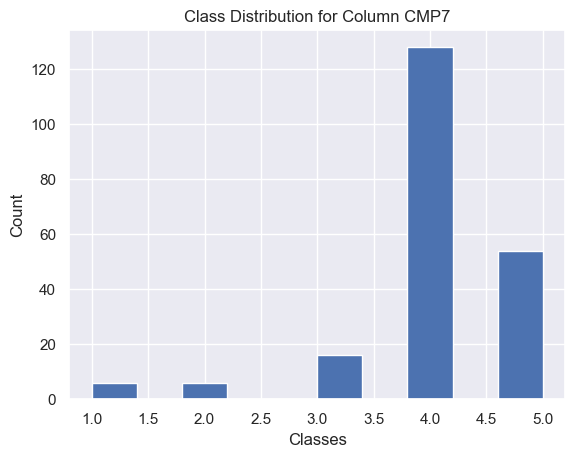

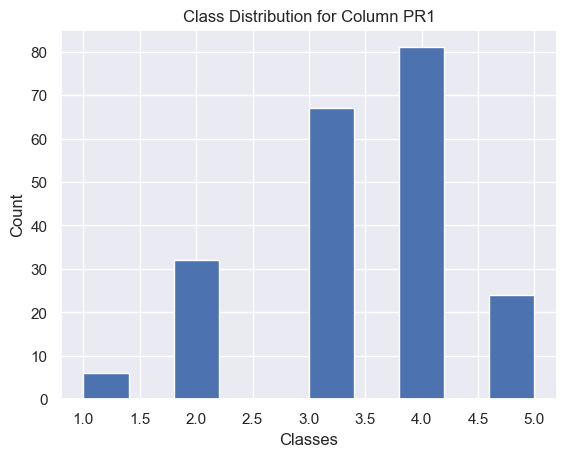

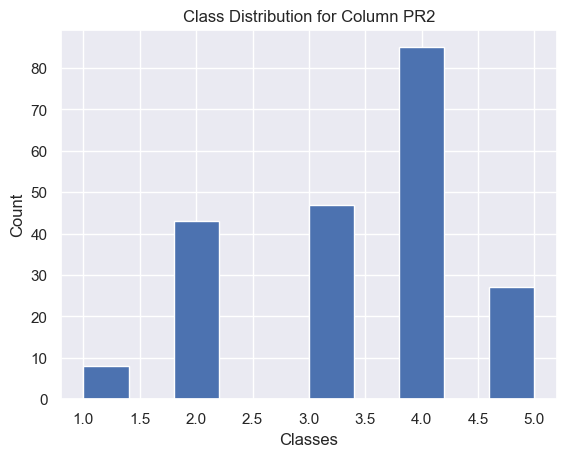

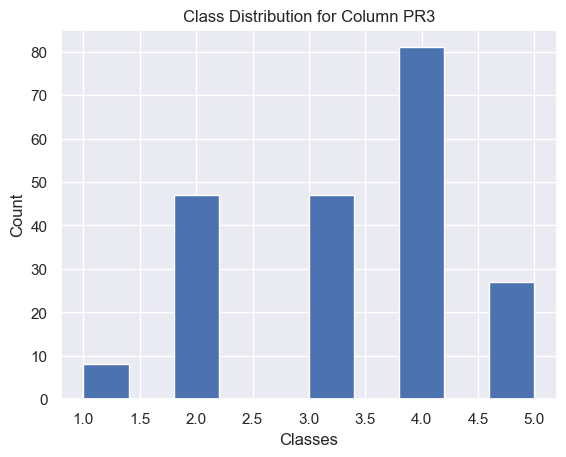

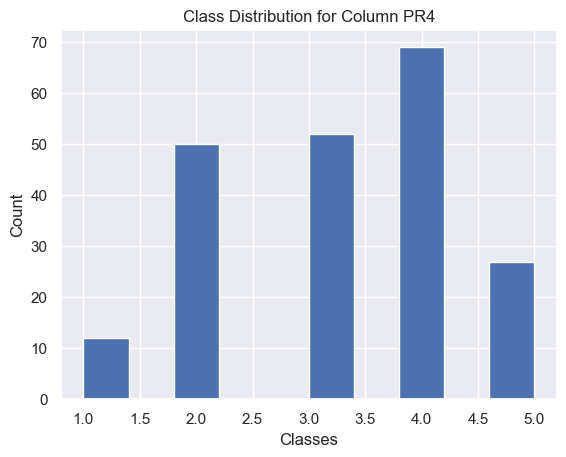

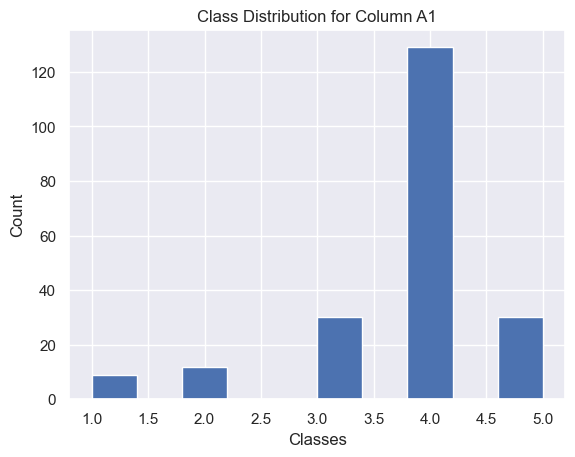

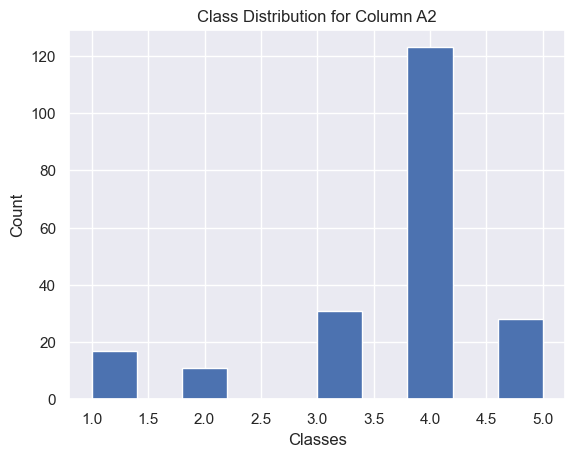

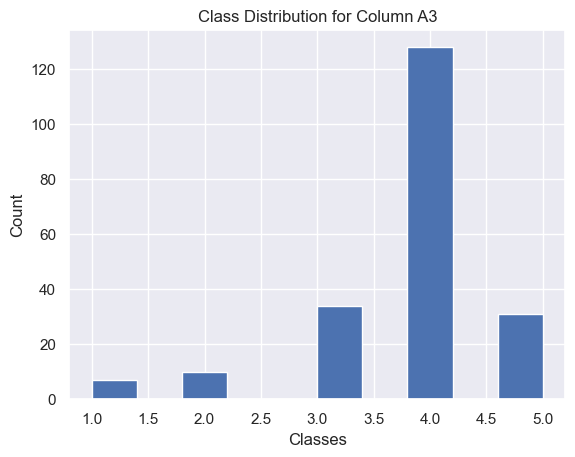

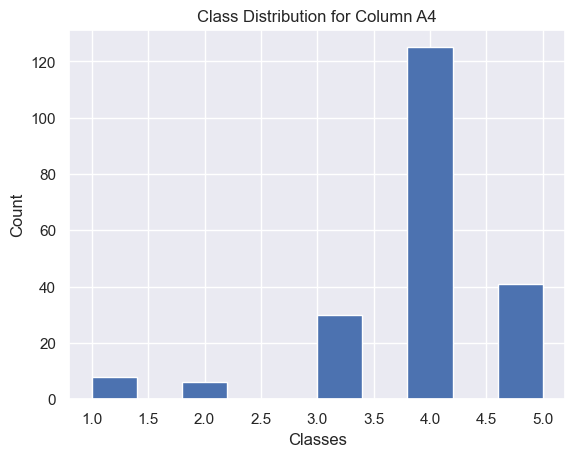

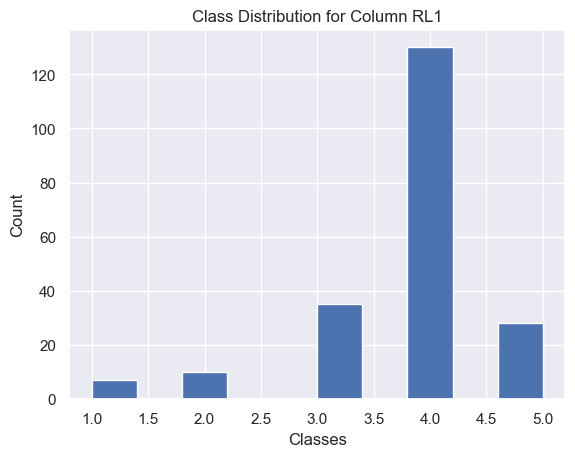

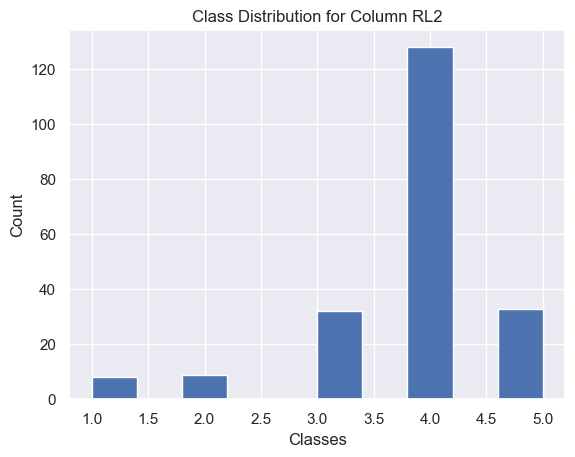

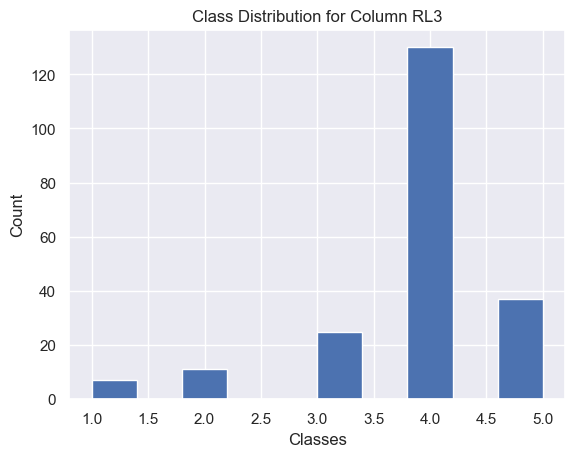

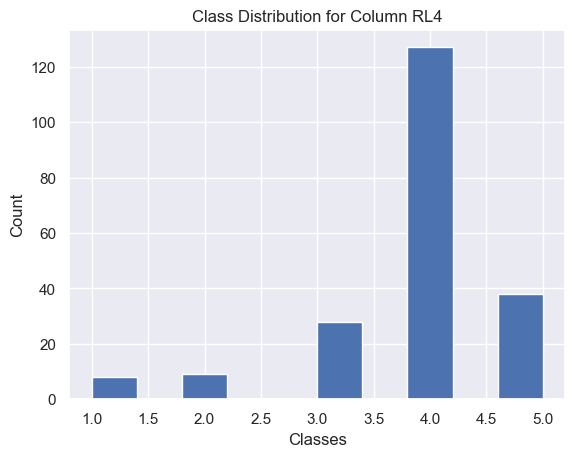

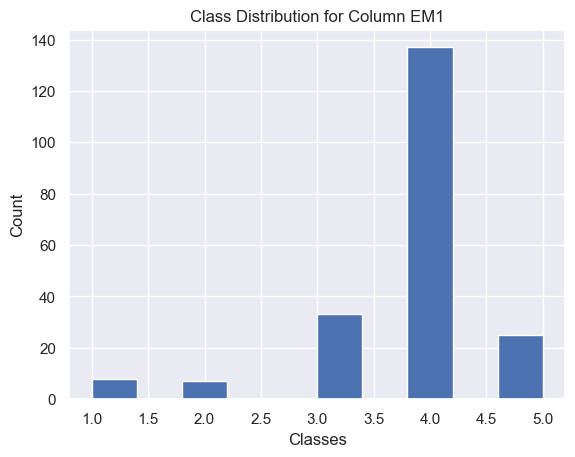

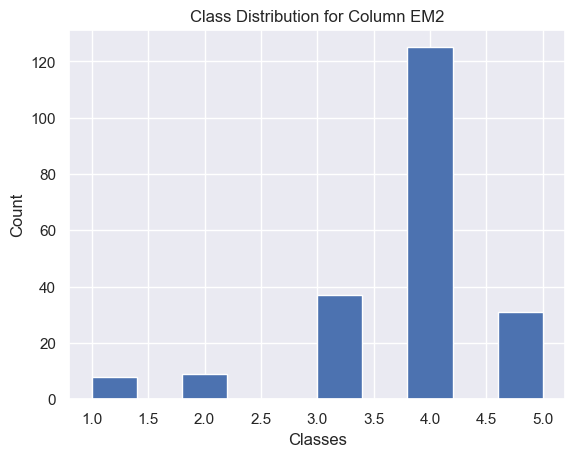

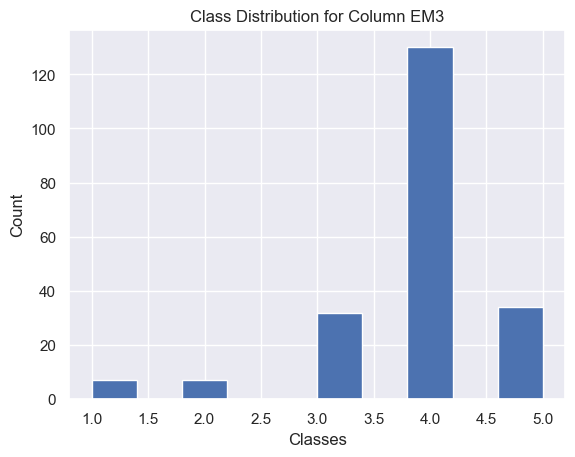

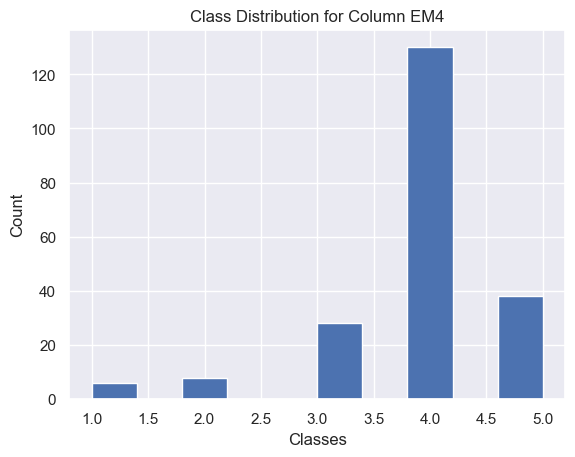

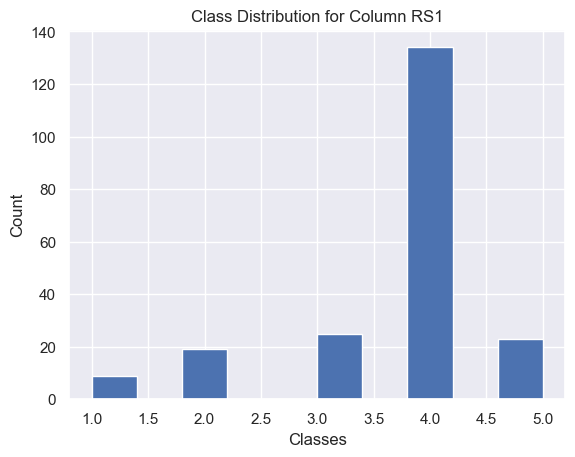

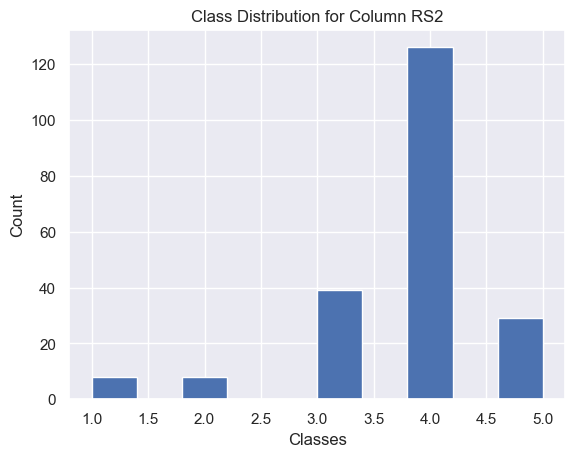

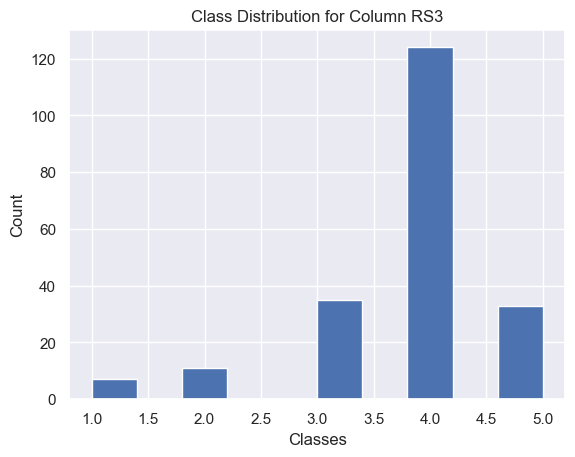

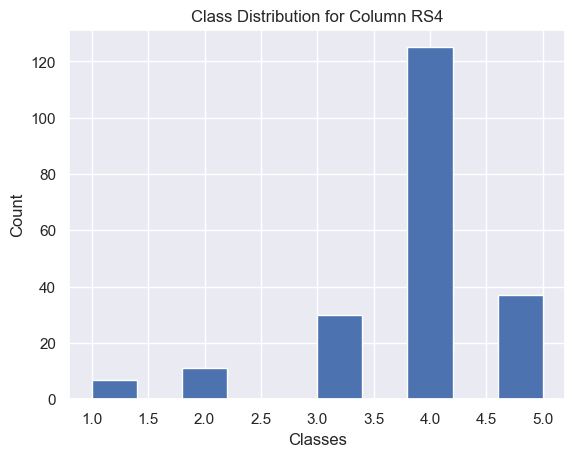

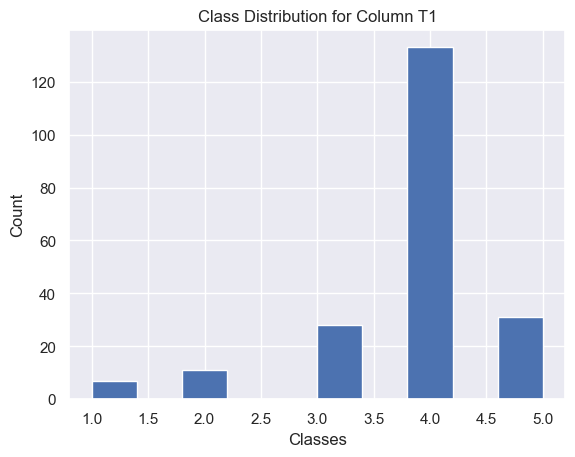

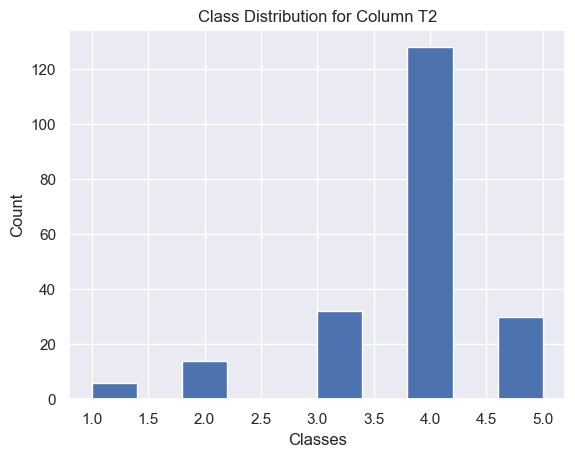

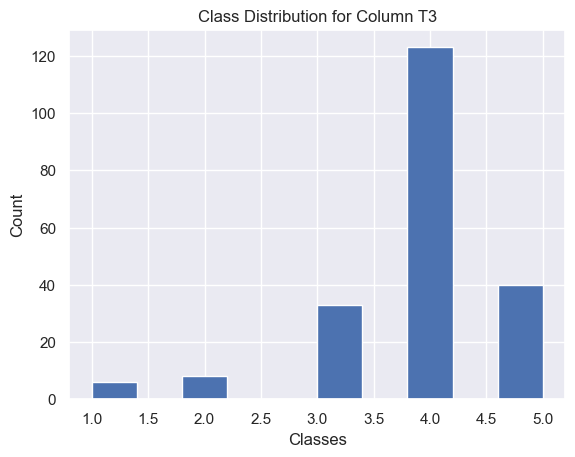

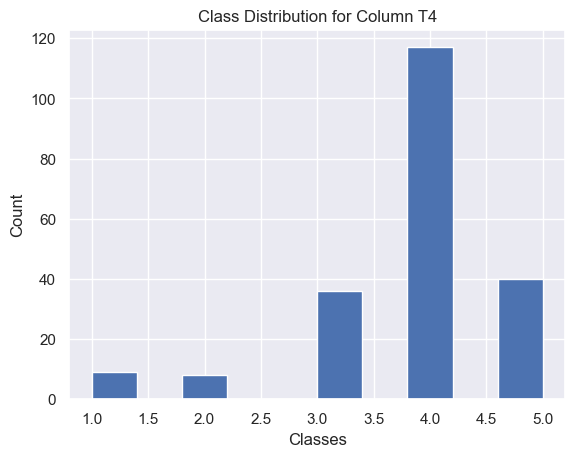

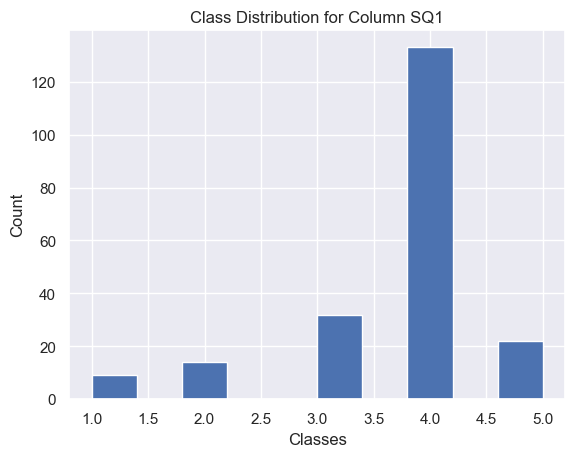

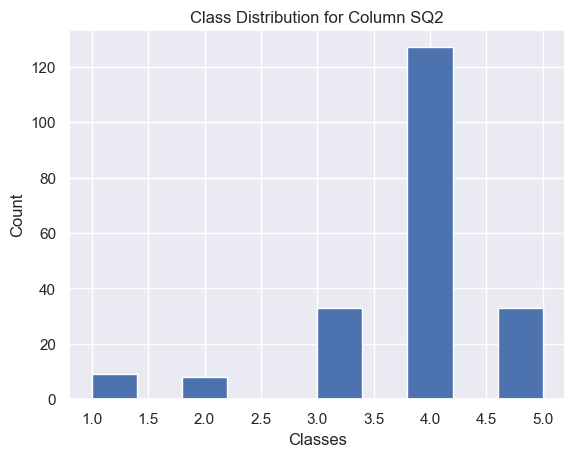

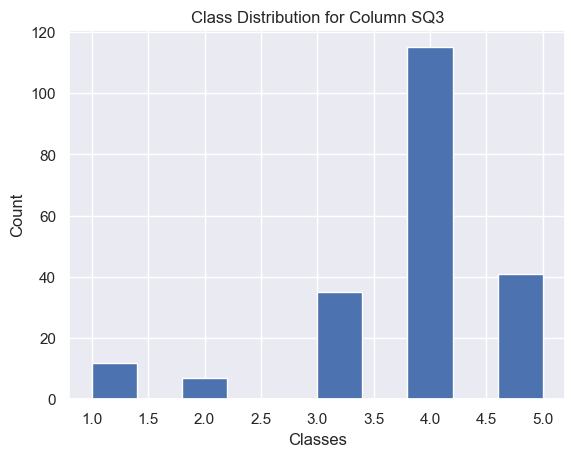

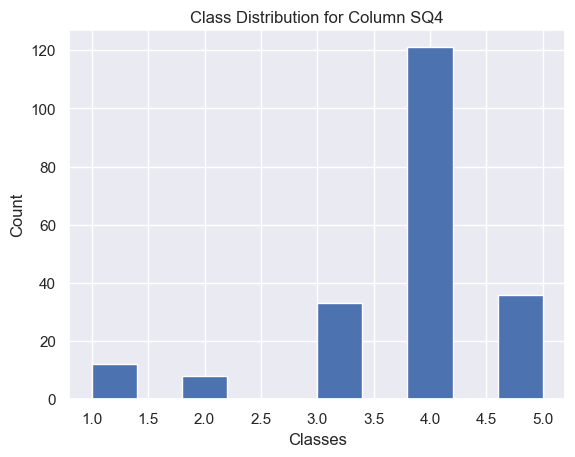

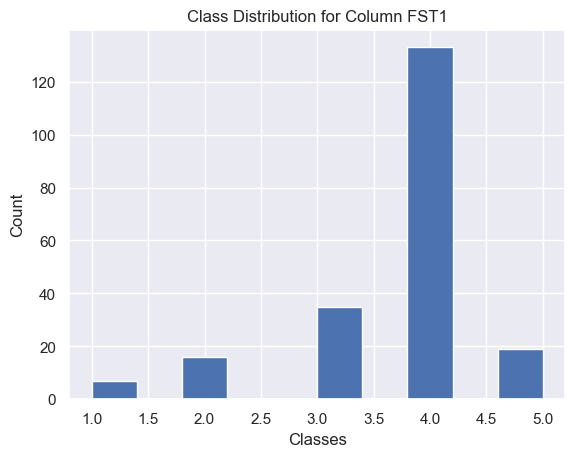

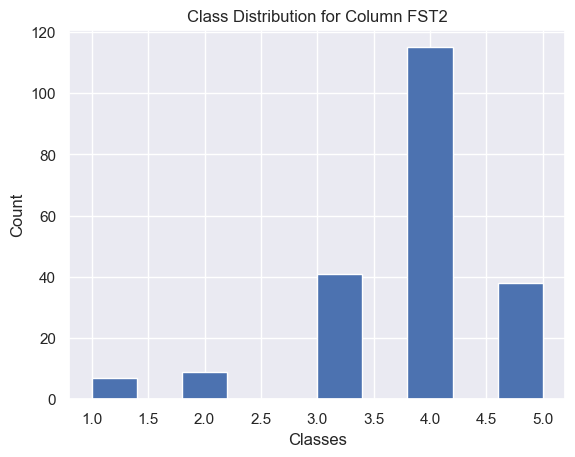

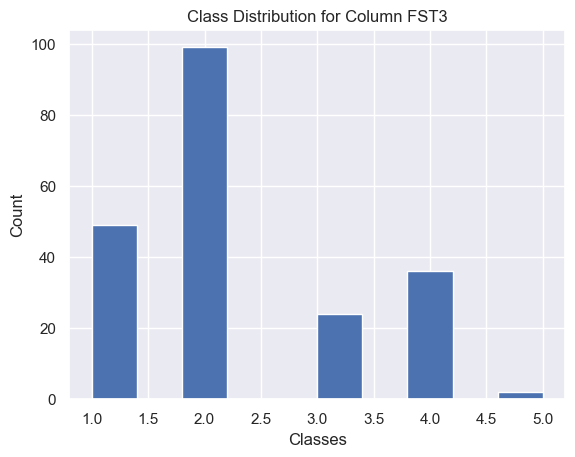

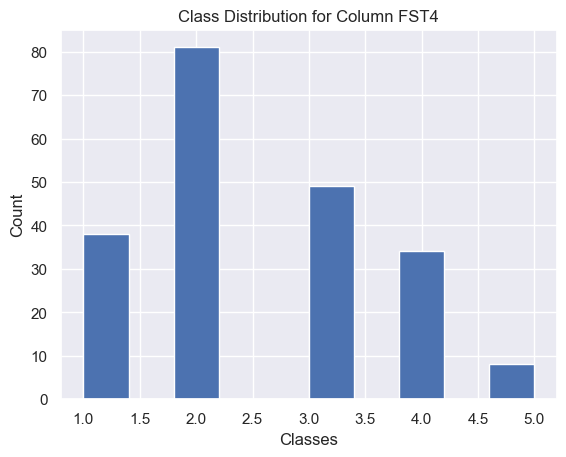

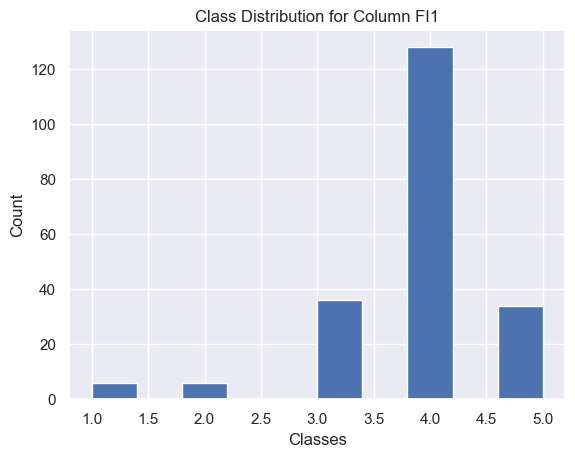

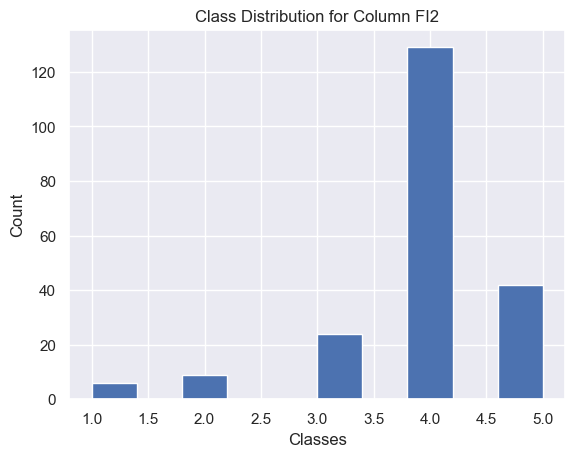

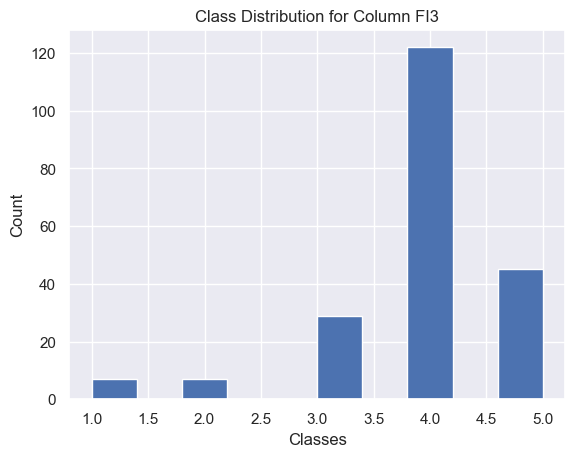

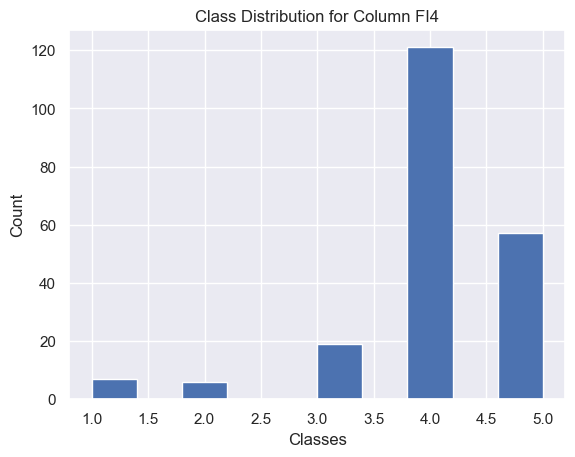

In [12]:
# Iterate through each column in the DataFrame
for col in df.columns:
    # Create a histogram for the current column
    plt.hist(df[col])
    plt.xlabel('Classes')  # Label for the x-axis (Categories or Bins)
    plt.ylabel('Count')  # Label for the y-axis (Frequency)
    plt.title(f'Class Distribution for Column {col}')  # Set the title of the histogram
    plt.show()  # Display the histogram

In [13]:
df_normalized=(df - df.mean()) / df.std() # Normalize

# Initialize PCA with the number of components equal to the number of original features
pca = PCA(n_components=df.shape[1])

# Fit PCA to the normalized data
pca.fit(df_normalized)

PCA(n_components=83)

In [14]:
# Create a DataFrame of PCA loadings
loadings = pd.DataFrame(pca.components_.T,
                       columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
                       index=df.columns)

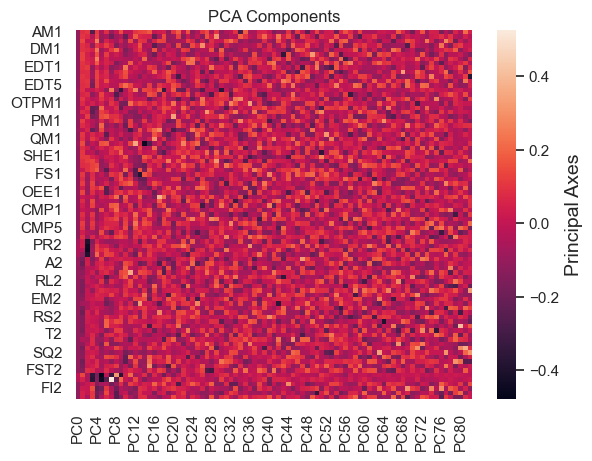

In [15]:
# Create a heatmap of the PCA loadings
ax = sns.heatmap(loadings, cbar_kws={'label': 'Principal Axes'})

# Increase the font size of the colorbar label
ax.figure.axes[-1].yaxis.label.set_size(14)

# Set the title of the heatmap
plt.title('PCA Components')

# Display the heatmap
plt.show()

In [16]:
print(f'Number of features seen during fit: {pca.n_features_in_}')
print(f'Estimated Noise Covariance: {pca.noise_variance_}')

Number of features seen during fit: 83
Estimated Noise Covariance: 0.0


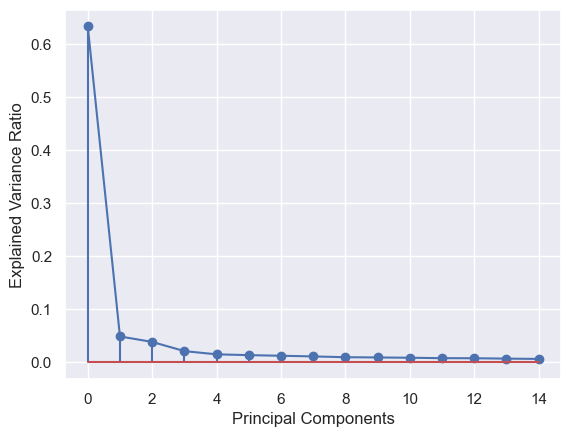

In [17]:
# Plot the explained variance ratio for the first 15 principal components
plt.plot(pca.explained_variance_ratio_[:15])  # Line plot for a smooth curve

# Add a stem plot to highlight individual variance values
plt.stem(pca.explained_variance_ratio_[:15])  

# Set the y-axis label
plt.ylabel('Explained Variance Ratio')  

# Set the x-axis label
plt.xlabel('Principal Components')  

# Display the plot
plt.show()  

In [18]:
# Get the explained variance ratio for all principal components
var_ratio = pca.explained_variance_ratio_

# Calculate the gradient of the explained variance ratio
grad = np.diff(var_ratio) * -1  

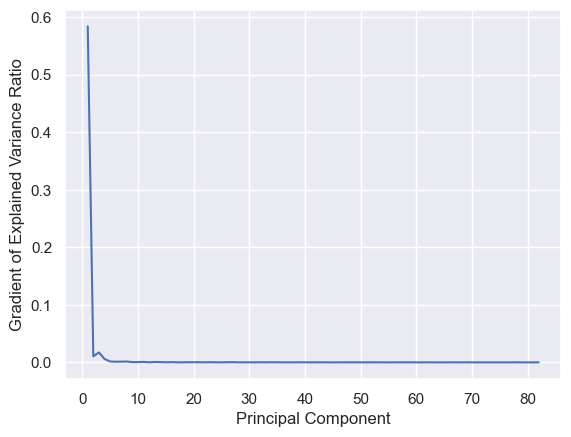

In [19]:
# Plot the gradient
plt.plot(np.arange(1, len(grad) + 1), grad)  # Shift x-axis by 1 to start from the second component

# Set the y-axis label
plt.ylabel('Gradient of Explained Variance Ratio')

# Set the x-axis label
plt.xlabel('Principal Component')

# Display the plot
plt.show()